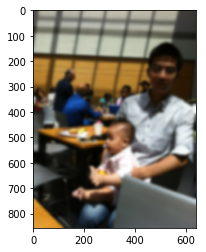

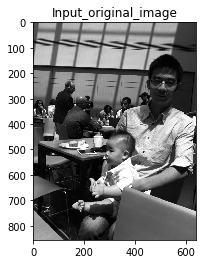

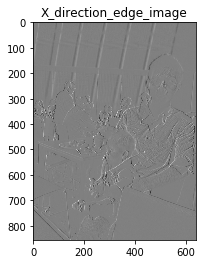

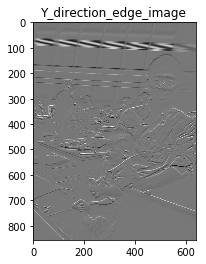

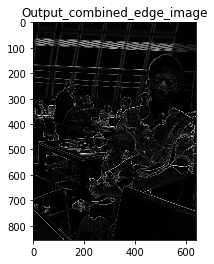

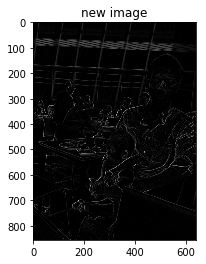

In [5]:
#change the color image into the grey level
#do the edge detector and get the edge image

import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
import math
import os

def rgb2gray(rgb):
    #return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])






def plot_image(image,image_name,title_of_the_image='hough_simple_1 original image'):
    plt.imshow(image, cmap='gray')
    plt.title(title_of_the_image)
    plt.savefig("/Users/jimmy/Dropbox/001 Courses/2016 fall/CV/assignment/hw3/"+image_name[:-4]+title_of_the_image+'.png')
    plt.show()

def zero_padding(input_array):
    #insert zeros to the first column and first row
    output_array=np.insert(input_array, 0, values=0, axis=1)
    output_array=np.insert(output_array, 0, values=0, axis=0)
    z = np.zeros((len(output_array[:,0]),1))
    output_array= np.append(output_array, z, axis=1)
    z = np.zeros((1, len(output_array[0,:])))
    output_array= np.append(output_array, z, axis=0)
    #print(output_array)
    return output_array

def un_zero_padding(input_array):
    p=scipy.delete(input_array, 0, 1)
    p=scipy.delete(p, -1, 1)
    p=scipy.delete(p, 0, 0)
    p=scipy.delete(p, -1, 0)
    return p

    
    
def some_filter(original_image, filter):
    #zero padding is used for the boundary
    #here the image is the image_after_zero_padding
    #print("original_image",original_image.shape)
    image=zero_padding(original_image)
    #print("image_after_zero_padding.shape",image.shape)
    image_after_filter = np.zeros(image.shape)
    #print("image_after_filter.shape",image_after_filter.shape)
    for i in range (len(image[:,0])-2):
        for j in range(len(image[0,:])-2):
            image_after_filter[i+1][j+1]=image[i][j]*filter[0][0]+image[i][j+1]*filter[0][1]+image[i][j+2]*filter[0][2]+image[i+1][j]*filter[1][0]+image[i+1][j+1]*filter[1][1]+image[i+1][j+2]*filter[1][2]+image[i+2][j]*filter[2][0]+image[i+2][j+1]*filter[2][1]+image[i+2][j+2]*filter[2][2]
    image_after_filter=un_zero_padding(image_after_filter)
    #print(image_after_filter.shape)
    return image_after_filter


def combine_x_y_edge_image(x, y):
    """This function is used to combine the x direction edge image
    and the y direction image.
    The formular used here is sqrt(x^2+y^2)"""
    com_output = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            com_output[i,j]=math.sqrt(x[i,j]**2+y[i,j]**2)
    return com_output
        
        
        
    
def edge_detector(image_name):
    
    """This function is used to resolve the programming homework h1. It is used 
    to do the edge detection based on the sobel filter."""
    
    img = mpimg.imread(image_name) 
    gaussian_image=ndimage.gaussian_filter(img, sigma=(5, 5, 0), order=0)
    imgplot = plt.imshow(gaussian_image)
    plt.savefig(os.getcwd()+'/gaussian_blur.jpg')
    plt.show()
    
    input_gray_level_image = rgb2gray(img)    
    #plt.imshow(gray, cmap = plt.get_cmap('gray'))
    #plt.show()
    #input_gray_level_image = read_pgm(image_name)
    plot_image(input_gray_level_image,image_name, 'Input_original_image')
    
    
    #plot_image(gaussian_image,image_name, 'gaussian blur')
    
    # sobel filter is used here to detect the edge 
    #x-direction kernel
    
    x_direction_sobel_kernel=np.array([[-1, 0 ,1],[-2, 0 ,2],[-1, 0 ,1]])
    y_direction_sobel_kernel=np.array([[-1, -2 ,-1],[0, 0 ,0],[1, 2 ,1]])
    x_direction_edge= some_filter(input_gray_level_image, x_direction_sobel_kernel)
    y_direction_edge= some_filter(input_gray_level_image, y_direction_sobel_kernel)
    output_gray_level_edge_image = combine_x_y_edge_image(x_direction_edge,y_direction_edge)
    
    plot_image(x_direction_edge,image_name,'X_direction_edge_image')
    plot_image(y_direction_edge,image_name,'Y_direction_edge_image')
    plot_image(output_gray_level_edge_image,image_name,'Output_combined_edge_image')
    
    combine_edge_image_and_x_direction_edge=np.zeros(x_direction_edge.shape)
    for i in range(x_direction_edge.shape[0]):
        for j in range(x_direction_edge.shape[1]):
             combine_edge_image_and_x_direction_edge[i,j]=x_direction_edge[i,j]+output_gray_level_edge_image[i,j]
    plot_image(combine_edge_image_and_x_direction_edge,image_name,'new image')
    
    return output_gray_level_edge_image
    

if __name__ == '__main__':
    # Get the input gray level image based on the file name
    image_name = "IMG_9174.JPG"
    """
    This is related to the h1 of the assignment 3 of the computer vision course
    Output_gray_level_edge_image is the out put image
    The input grey level image is the input
    """
    edge_detector(image_name)
    #output_gray_level_edge_image = h1(image_name)

